In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("C:\\Users\HP\OneDrive\Desktop\heart_disease for gradient.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape


(303, 14)

In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
#lets check if the dataset is balanced or not
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
#The data set seems balanced

In [6]:
#Lets check for the null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.shape

(303, 14)

In [ ]:
#There is no null values 

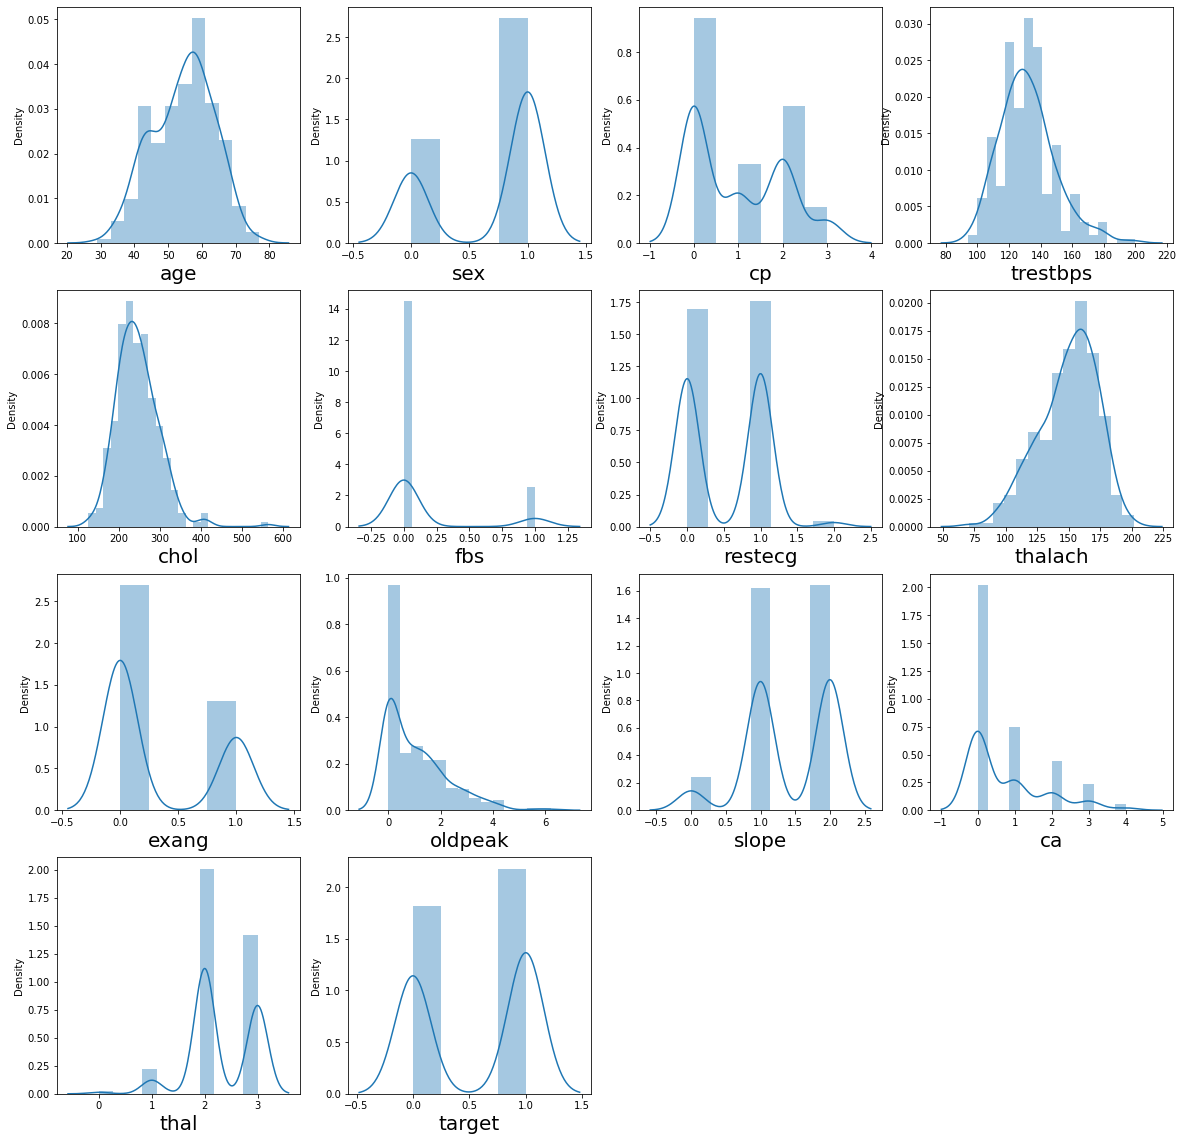

In [8]:
#Now,lets check how the features are distributed
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [12]:
#All the continous variables/features looks normally distributed,we ignore the categorical features here

In [13]:
#lets do some feature engineering to check whether we can skip some features 
data.drop('target',axis=1).corrwith(data.target)

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
dtype: float64

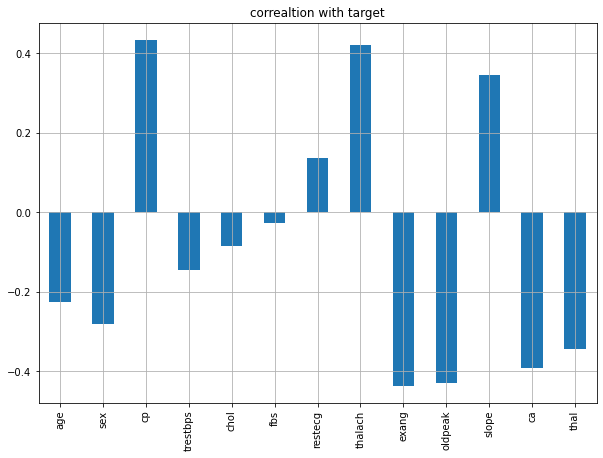

In [14]:
#lets visualise the same
data.drop('target',axis=1).corrwith(data.target).plot(kind='bar',grid=True,figsize=(10,7),title="correaltion with target")
plt.show()

In [16]:
X=data.drop(['target'],axis=1)
y=data.target

In [17]:
from sklearn.feature_selection import SelectPercentile,chi2
SPercentile=SelectPercentile(score_func=chi2,percentile=80)#here we want top 80 percent features
SPercentile=SPercentile.fit(X,y)
#separating the features to check p values
cols=SPercentile.get_support(indices=True) #get support is a method to get score of f value and storing their index
features=X.columns[cols] #feature name are stored here
df_scores=pd.DataFrame({'features':X.columns,
                        'Chi2SCore':SPercentile.scores_,
                         'pvalue':SPercentile.pvalues_})
df_scores.sort_values(by='Chi2SCore',ascending =False)


,features,Chi2SCore,pvalue
7,thalach,188.320472,7.395102e-43
9,oldpeak,72.644253,1.552583e-17
11,ca,66.440765,3.605677e-16
2,cp,62.598098,2.534982e-15
8,exang,38.914377,4.428074e-10
4,chol,23.936394,9.957148e-07
0,age,23.286624,1.395673e-06
3,trestbps,14.823925,1.180286e-04
10,slope,9.804095,1.741237e-03
1,sex,7.576835,5.912318e-03


In [18]:
print(cols) #These are the top 80 features indexes 
print(features)

[ 0  1  2  3  4  7  8  9 10 11]
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca'],
      dtype='object')


In [20]:
#creating subset of selected features
X=data[features]
y=data.target

In [21]:
X

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca
0,63,1,3,145,233,150,0,2.3,0,0
1,37,1,2,130,250,187,0,3.5,0,0
2,41,0,1,130,204,172,0,1.4,2,0
3,56,1,1,120,236,178,0,0.8,2,0
4,57,0,0,120,354,163,1,0.6,2,0
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,123,1,0.2,1,0
299,45,1,3,110,264,132,0,1.2,1,0
300,68,1,0,144,193,141,0,3.4,1,2
301,57,1,0,130,131,115,1,1.2,1,1


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scalar=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_scalar,y,test_size=.3,random_state=42)

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [26]:
gbdt_clf=GradientBoostingClassifier()
gbdt_clf.fit(X_train,y_train)
pred=gbdt_clf.predict(X_train)
gbdt_clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))
print("/n==========Train Result======")
print(f"Accuracy Score:{accuracy_score(y_train,pred)}")
print("_______________________________________")
print(f"Classification_report:\n{gbdt_clf_report}")
print("_______________________________________")
print(f"Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")
#**************TEST SCORE**************
pred=gbdt_clf.predict(X_test)
clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))

print("/n==========TEST Result======")
print(f"Accuracy Score:{accuracy_score(y_test,pred)}")
print("_______________________________________")
print(f"Classification_report:\n{clf_report}")
print("_______________________________________")
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n")
      
      


/n==========Train Result======
Accuracy Score:1.0
_______________________________________
Classification_report:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    97.0  115.0       1.0      212.0         212.0
_______________________________________
Confusion Matrix:
[[ 97   0]
 [  0 115]]

/n==========TEST Result======
Accuracy Score:0.8351648351648352
_______________________________________
Classification_report:
                   0          1  accuracy  macro avg  weighted avg
precision   0.809524   0.857143  0.835165   0.833333      0.835688
recall      0.829268   0.840000  0.835165   0.834634      0.835165
f1-score    0.819277   0.848485  0.835165   0.833881      0.835325
support    41.000000  50.000000  0.835165  91.000000     91.000000
_______________________________________
Confusion Mat

In [ ]:
#Now lets do the hyperparamaeter tuning to improve the score and mainly decrease the recall or sensitivity

In [27]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Since GBDT uses decision tree as its estimator so we willuse the parameters of that of decision tree

In [30]:
grid_param={
            'max_depth':range(4,12,2),
            'learning_rate':np.arange(0.1,1,0.1),
            'min_samples_split':range(4,8,2)
}

In [31]:
grid=GridSearchCV(gbdt_clf,param_grid=grid_param)
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(4, 12, 2),
                         'min_samples_split': range(4, 8, 2)})

In [32]:
grid.best_params_

{'learning_rate': 0.9, 'max_depth': 8, 'min_samples_split': 4}

In [ ]:
#Lets change the parameters and see the result:

In [34]:
gbdt_clf=GradientBoostingClassifier(learning_rate=0.9, max_depth= 8, min_samples_split= 4)
gbdt_clf.fit(X_train,y_train)
pred=gbdt_clf.predict(X_train)
gbdt_clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))
print("/n==========Train Result======")
print(f"Accuracy Score:{accuracy_score(y_train,pred)}")
print("_______________________________________")
print(f"Classification_report:\n{gbdt_clf_report}")
print("_______________________________________")
print(f"Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")
#**************TEST SCORE**************
pred=gbdt_clf.predict(X_test)
clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))

print("/n==========TEST Result======")
print(f"Accuracy Score:{accuracy_score(y_test,pred)}")
print("_______________________________________")
print(f"Classification_report:\n{clf_report}")
print("_______________________________________")
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n")
      
      


/n==========Train Result======
Accuracy Score:1.0
_______________________________________
Classification_report:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    97.0  115.0       1.0      212.0         212.0
_______________________________________
Confusion Matrix:
[[ 97   0]
 [  0 115]]

/n==========TEST Result======
Accuracy Score:0.7912087912087912
_______________________________________
Classification_report:
                   0          1  accuracy  macro avg  weighted avg
precision   0.761905   0.816327  0.791209   0.789116      0.791807
recall      0.780488   0.800000  0.791209   0.790244      0.791209
f1-score    0.771084   0.808081  0.791209   0.789583      0.791412
support    41.000000  50.000000  0.791209  91.000000     91.000000
_______________________________________
Confusion Mat

In [35]:
#Here we can play around the parameters and improve our accuracy